<a href="https://colab.research.google.com/github/trikala56/120-Data-Science-Interview-Questions/blob/master/Reviewed_CNN_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lung Pneumonia CNN
shows how to use an archive.zip file as a data source.

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator #image generator label data based on the dir the image in contained in
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image

%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [6]:
import os
import zipfile

local_zip = '/content/gdrive/My Drive/Colab Dataset/chest_xray.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/chest_xray')
zip_ref.close()

FileNotFoundError: ignored

In [ ]:
train_normal_dir = os.path.join('/tmp/chest_xray/chest_xray/train/NORMAL')
train_pneumonia_dir = os.path.join('/tmp/chest_xray/chest_xray/train/PNEUMONIA')
test_normal_dir = os.path.join('/tmp/chest_xray/chest_xray/val/NORMAL')
test_pneumonia_dir = os.path.join('/tmp/chest_xray/chest_xray/val/PNEUMONIA')

train_normal_names = os.listdir(train_normal_dir)
train_pneumonia_names = os.listdir(train_pneumonia_dir)
test_normal_names = os.listdir(test_normal_dir)
test_pneumonia_names = os.listdir(test_pneumonia_dir)

In [ ]:
print('total train normal chest xray: ', len(os.listdir(train_normal_dir)))
print('total train pneumonia chest xray:', len(os.listdir(train_pneumonia_dir)))
print('total test normal chest xray: ', len(os.listdir(test_normal_dir)))
print('total test pneumonia chest xray: ', len(os.listdir(test_pneumonia_dir)))

total train normal chest xray:  1341
total train pneumonia chest xray: 3875
total test normal chest xray:  8
total test pneumonia chest xray:  8


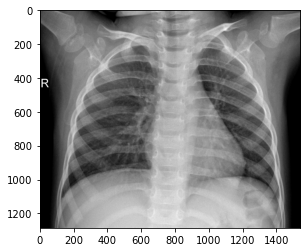

In [ ]:
train_normal_names[1]
# 'IM-0544-0001.jpeg'
img = mpimg.imread(os.path.join(train_normal_dir,'IM-0544-0001.jpeg'))
plt.imshow(img, cmap = 'gray')

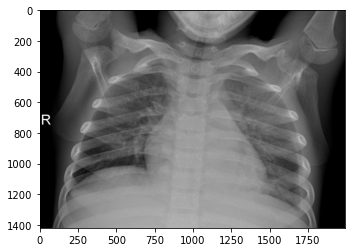

In [ ]:
train_pneumonia_names[1]
# 'person297_virus_614.jpeg'
img = mpimg.imread(os.path.join(train_pneumonia_dir, 'person297_virus_614.jpeg'))
plt.imshow(img, cmap = 'gray')

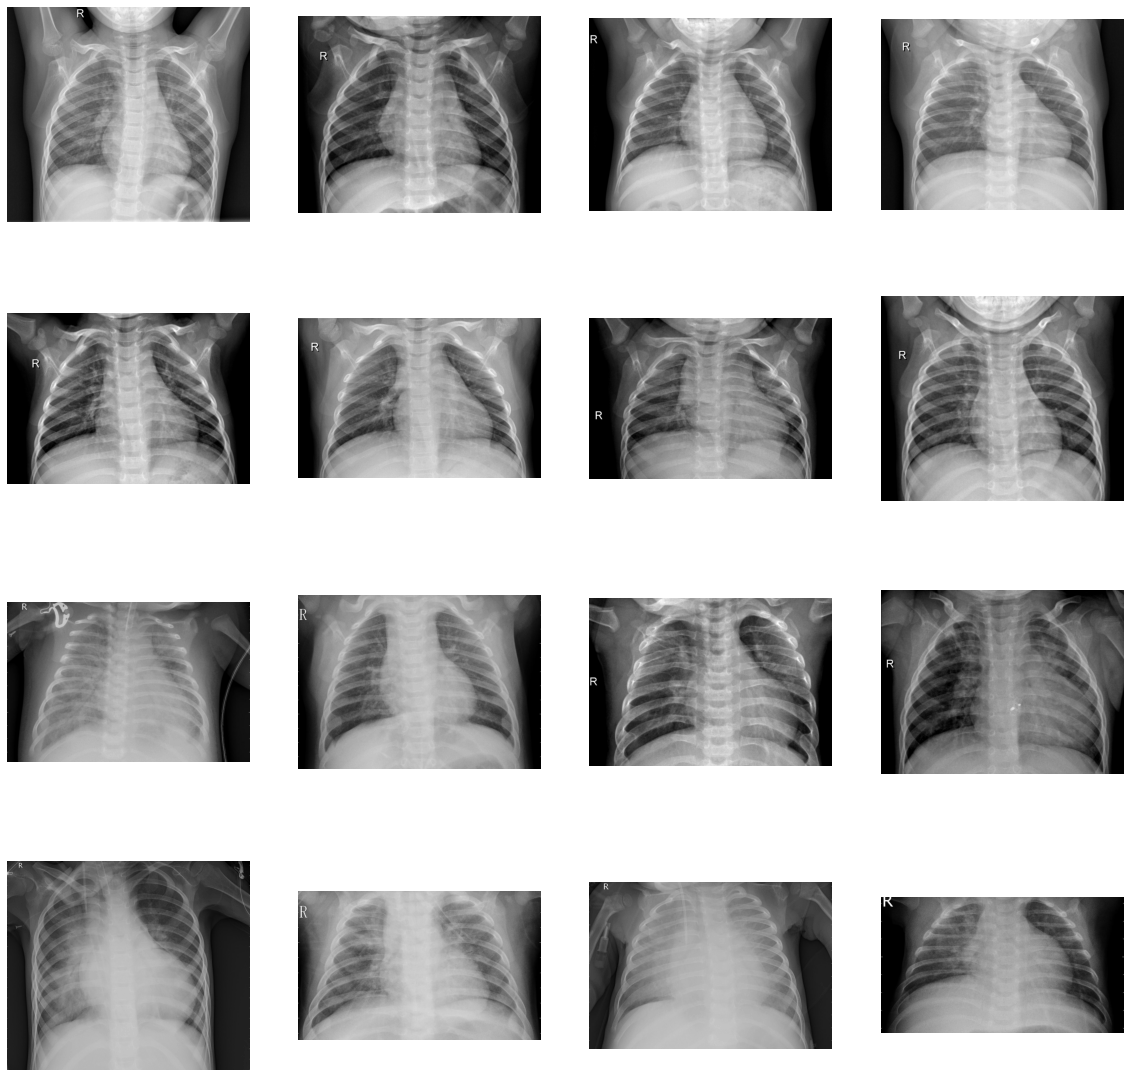

In [ ]:
# parameters for graph
nrows = 4
ncols = 4


fig = plt.gcf() #get the current image
fig.set_size_inches(20, 20) #image size

next_normal_pix = [os.path.join(train_normal_dir, fname) 
                    for fname in train_normal_names[0:8]]
next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname)
                      for fname in train_pneumonia_names[0:8]]

for i, img_path in enumerate(next_normal_pix + next_pneumonia_pix):
  # set up subplot
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = 'gray')

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('normal') clas and 1 for ('pneumonia') class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# to get the summary of the model
model.summary()

# configure the model for traning by adding metrics
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/chest_xray/chest_xray/train/',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/tmp/chest_xray/chest_xray/val/',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

# training the model
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = validation_generator
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 65s 7s/step - loss: 0.8374 - accuracy: 0.6328 - val_loss: 0.7774 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 74s 7s/step - loss: 0.5777 - accuracy: 0.7477 - val_loss: 0.9499 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 73s 7s/step - loss: 0.4794 - accuracy: 0.7828 - val_loss: 0.8080 - val_accuracy: 0.5625
Epoch 4/10
10/10 [==============================] - 61s 6s/step - loss: 0.3800 - accuracy: 0.8566 - val_loss: 0.7078 - val_accuracy: 0.6250
Epoch 5/10
10/10 [==============================] - 62s 6s/step - loss: 0.3504 - accuracy: 0.8680 - val_loss: 0.7071 - val_accuracy: 0.5625
Epoch 6/10
10/10 [==============================] - 64s 6s/step - loss: 0.3034 - accuracy: 0.8805 - val_loss: 0.6655 - val_accuracy: 0.6875
Epoch 7/10
10/10 [==============================] - 48s 5s/step - loss: 0.3138

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
10/10 [==============================] - 49s 5s/step - loss: 0.1697 - accuracy: 0.9344 - val_loss: 0.5487 - val_accuracy: 0.7500
Epoch 2/10
10/10 [==============================] - 50s 5s/step - loss: 0.1817 - accuracy: 0.9320 - val_loss: 0.7852 - val_accuracy: 0.6875
Epoch 3/10
10/10 [==============================] - 60s 6s/step - loss: 0.1917 - accuracy: 0.9312 - val_loss: 0.2643 - val_accuracy: 0.8750
Epoch 4/10
10/10 [==============================] - 60s 6s/step - loss: 0.2691 - accuracy: 0.9287 - val_loss: 0.4856 - val_accuracy: 0.8125
Epoch 5/10
10/10 [==============================] - 59s 6s/step - loss: 0.1416 - accuracy: 0.9508 - val_loss: 0.3088 - val_accuracy: 0.8750
Epoch 6/10
10/10 [==============================] - 58s 6s/step - loss: 0.1417 - accuracy: 0.9477 - val_loss: 0.2780 - val_accuracy: 0.8750
Epoch 7/10
10/10 [==============================] - 59s 6s/step - loss: 0.1429 - accuracy: 0.9414 - val_loss: 0.4516 - val_accuracy: 0.8125
Epoch 8/10
10/10 [==

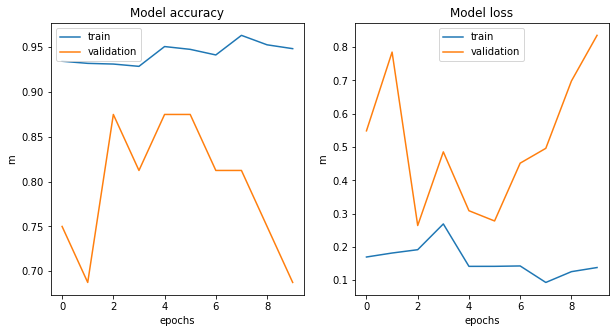

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

metric = ['accuracy', 'loss']
for i, m in enumerate(metric):
  ax[i].plot(history.history[m])
  ax[i].plot(history.history['val_'+ m])
  ax[i].set_title('Model {}'.format(m))
  ax[i].set_xlabel('epochs')
  ax[i].set_ylabel('m')
  ax[i].legend(['train', 'validation'])

In [ ]:
# load new unseen dataset
test_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_directory(
    '/tmp/chest_xray/chest_xray/val/',
    target_size = (300, 300),
    batch_size = 128, 
    class_mode = 'binary'
)

eval_result = model.evaluate_generator(test_generator, 16)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

Found 16 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
loss rate at evaluation data : 0.8355244398117065
accuracy rate at evaluation data : 0.6875


In [ ]:
# predictions
model.predict(X_test[:4])

In [ ]:
y_test[:4]

In [ ]:
#Done use this its too complex

#uploaded = files.upload()

#for fn in uploaded.keys():
  # predict images
#  path = '/content/' + fn
#  img = image.load_img(path, target_size=(300,300))
#  x = image.img_to_array(img)
#  x = np.expand_dims(x, axis =0)

#  images = np.vstack([x])
#  classes = model.predict(images, batch_size = 10)
#  print(classes[0])
#  if classes[0]> 0.5:
#    print(fn + ' is pneumonia')
#    plt.imshow(img)
#  else:
#    print(fn + 'is normal')
#    plt.imshow(img)